In [ ]:
import pandas as pd
import numpy as np

***how to find the correct encoding of your dataset***

In [ ]:
!pip install chardet
import chardet

with open('spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

print(f"Detected file encoding: {encoding}")

Detected file encoding: Windows-1252


In [ ]:
df = pd.read_csv('spam.csv',  encoding='Windows-1252')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


###Droping 3 unused column###

In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###Checking for missing and dupicated values###

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates()

###EDA###

 univarirate analysis

In [ ]:
df['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [ ]:
df['v1'].value_counts().index

Index(['ham', 'spam'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt

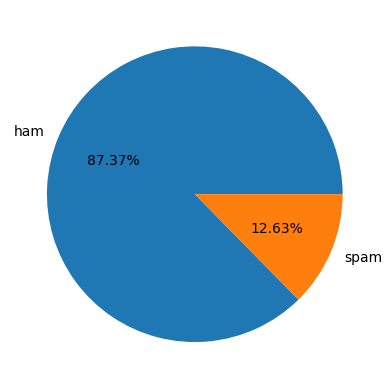

In [ ]:
plt.pie(df['v1'].value_counts(), labels =df['v1'].value_counts().index, autopct = '%0.2f%%')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Creating columns which help in traing our model and gives back more better result###

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
df['num_characters'] = df['v2'].apply(lambda x: len(x))

In [ ]:
df['num_word'] = df['v2'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,v1,v2,num_word,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


### Creating histogram

<Axes: xlabel='num_characters', ylabel='Count'>

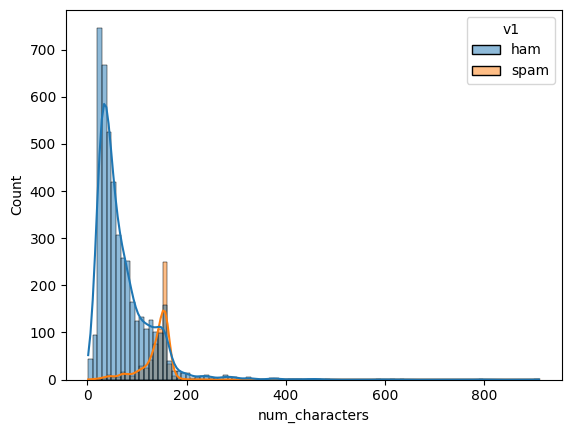

In [ ]:
import seaborn as sns
sns.histplot(data = df, x='num_characters', hue='v1', kde=True)

<Axes: xlabel='num_word', ylabel='Count'>

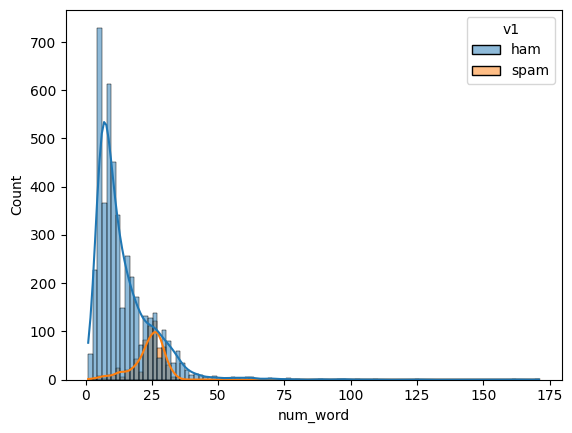

In [ ]:
# Skewed Data (right skewed)
sns.histplot(data = df, x='num_word', hue='v1', kde=True)

### Text preprocessing ▶
 # lower case
 # tokenize
 # removing stop words
 # lemmitizer


In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# we are creating a function which can able to all of this thing in one go!!

def trnf(text):
  text = text.lower()

  y = []
  for i in text.split():
    y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english'):
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(lemmatizer.lemmatize(i, pos='n'))

  return " ".join(y)

In [ ]:
df['tranform_text'] = df['v2'].apply(trnf)

In [ ]:
df.head()

,v1,v2,num_word,num_characters,tranform_text
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,"go jurong point, crazy.. available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,6,29,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,11,49,u dun say early hor... u c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,"nah think go usf, life around though"


### Converting text column to numerical using bog


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(df['tranform_text']).toarray()

In [ ]:
le = LabelEncoder()

y = le.fit_transform(df['v1'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()

In [ ]:
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8974854932301741